# Assignment 3: Exploring Unsupervised Learning with k-Means  
**Dataset:** Customers Dataset (Kaggle)  
**Group Name / Members:** Group-04
- Muntasir Islam
- Md Maruf
- Firoz Chowdhury
- Sakshi Sakshi



## Part 1: Familiarization and Basic Testing with k-Means  

## 1.1 Dataset Selection  
We selected the **Customers Dataset** from Kaggle.  
This dataset contains demographic and behavioral information about customers, which makes it suitable for **unsupervised learning** and **customer segmentation**.


## 1.2 Dataset Description  

**Features in the dataset:**  
- **CustomerID**: Unique identifier  
- **Gender**: Male/Female  
- **Age**: Customer age  
- **Annual Income ($)**: Yearly income  
- **Spending Score (1–100)**: Customer spending behavior  
- **Profession**: Customer profession  
- **Work Experience**: Years of experience  
- **Family Size**: Number of family members  



## 1.3 Load and Explore Dataset

In this section, we load the dataset **Customers.csv** and explore its structure to understand the data before applying any machine learning algorithms.

- The dataset is loaded using the pandas library.

- We use `head()` to display the first few rows to get an overview of the columns and data types.

- The `info()` function provides information about column names, data types, and missing values.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Load dataset
df = pd.read_csv("Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [7]:
# Dataset Information and Summary
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


## 1.4 Visualize the Data
Before applying k-Means, we visualize the dataset to understand the distribution
of Customers **Annual Income** & **Spending Score**


Text(0, 0.5, 'Spending Score (1-100)')

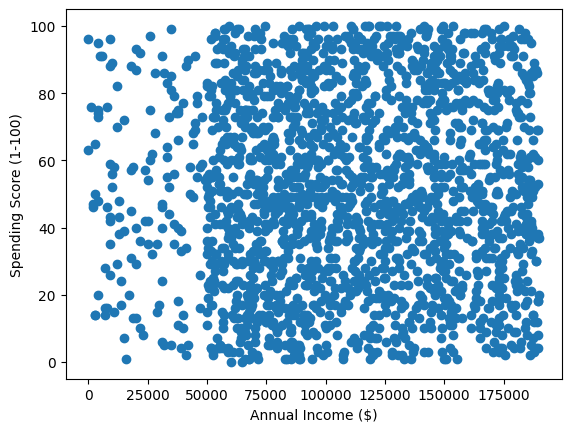

In [8]:
plt.scatter(df['Annual Income ($)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')


## 1.5 Applying the k-Means Algorithm  

We apply k-means using the **sklearn implementation**.  
First, we choose **k = 5** clusters


In [9]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income ($)', 'Spending Score (1-100)']])
df['cluster'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,cluster
0,1,Male,19,15000,39,Healthcare,1,4,2
1,2,Male,21,35000,81,Engineer,3,3,2
2,3,Female,20,86000,6,Engineer,1,1,0
3,4,Female,23,59000,77,Lawyer,0,2,3
4,5,Female,31,38000,40,Entertainment,2,6,2


## 1.6 Analyze Cluster Centers

The cluster centers represent the average values of **Annual Income ($)** and
**Spending Score (1–100)** for each cluster. These centers help us understand
the different customer groups created by the k-Means algorithm.


In [10]:
km.cluster_centers_

array([[1.00814189e+05, 5.12198444e+01],
       [1.39314989e+05, 5.25128205e+01],
       [2.24677419e+04, 4.96935484e+01],
       [6.62356620e+04, 4.93880000e+01],
       [1.73964223e+05, 5.11827411e+01]])

## 1.7 Cluster Visualization  

We visualize customer clusters using:
- **Annual Income**
- **Spending Score**


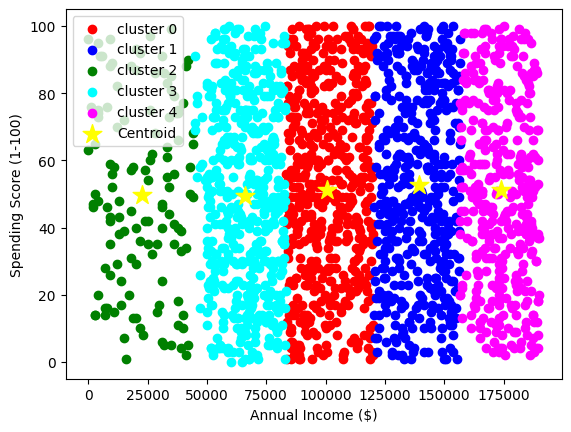

In [11]:
# Separate data for each cluster
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
df4 = df[df['cluster'] == 3]
df5 = df[df['cluster'] == 4]

# Plot each cluster
plt.scatter(df1['Annual Income ($)'], df1['Spending Score (1-100)'], color='red', label='cluster 0')
plt.scatter(df2['Annual Income ($)'], df2['Spending Score (1-100)'], color='blue', label='cluster 1')
plt.scatter(df3['Annual Income ($)'], df3['Spending Score (1-100)'], color='green', label='cluster 2')
plt.scatter(df4['Annual Income ($)'], df4['Spending Score (1-100)'], color='cyan', label='cluster 3')
plt.scatter(df5['Annual Income ($)'], df5['Spending Score (1-100)'], color='magenta', label='cluster 4')

# Plot centroids
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    color='yellow',
    marker='*',
    s=200,
    label='Centroid'
)

plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



## 1.8 Normalize the Data

The KMeans clustering algorithm is sensitive to the scale of the data. If one feature **Annual Income ($)** has a much larger range or variance than another feature **Spending Score (1-100)**, the clustering will be dominated by the feature with the larger range. This happens because KMeans calculates distances between data points to form clusters.

To address this, we normalize the **Annual Income ($)** and **Spending Score (1-100)** features so that their values are scaled between 0 and 1. Normalization ensures that both features contribute equally to the clustering process and can improve the performance of KMeans.

In [12]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize 'Annual Income ($)'
scaler.fit(df[['Annual Income ($)']])
df['Annual Income ($)'] = scaler.transform(df[['Annual Income ($)']])

# Normalize 'Spending Score (1-100)'
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

# Display the first few rows
df.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,cluster
0,1,Male,19,0.078958,0.39,Healthcare,1,4,2
1,2,Male,21,0.184236,0.81,Engineer,3,3,2
2,3,Female,20,0.452694,0.06,Engineer,1,1,0
3,4,Female,23,0.310569,0.77,Lawyer,0,2,3
4,5,Female,31,0.200027,0.40,Entertainment,2,6,2


## 1.9 Revisualize Normalized Data

After normalization, visualize the data again to confirm the changes.

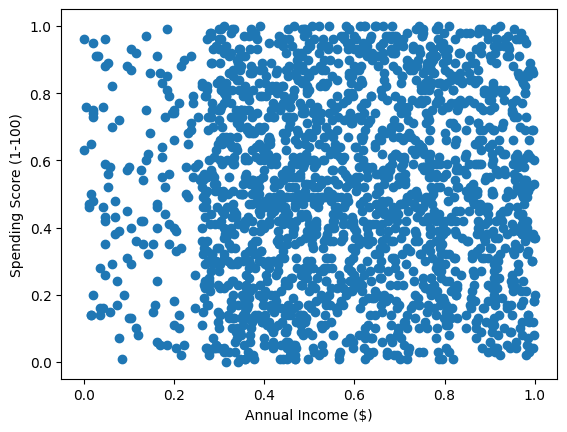

In [13]:
plt.scatter(df['Annual Income ($)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()


## 1.10 Reapply K-Means Clustering

After normalizing the data, we reapply K-Means clustering on the scaled **Annual Income ($)** and **Spending Score (1-100)** features to obtain updated cluster assignments. This ensures that the clustering considers both features equally and produces more meaningful clusters.

In [14]:
# Apply K-Means clustering with 5 clusters
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income ($)', 'Spending Score (1-100)']])

# Add the cluster assignments to the dataframe
df['cluster'] = y_predicted

# Display the first few rows
df.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,cluster
0,1,Male,19,0.078958,0.39,Healthcare,1,4,1
1,2,Male,21,0.184236,0.81,Engineer,3,3,2
2,3,Female,20,0.452694,0.06,Engineer,1,1,4
3,4,Female,23,0.310569,0.77,Lawyer,0,2,2
4,5,Female,31,0.200027,0.40,Entertainment,2,6,1


## 1.11 Revisualize Clusters with Normalized Data

After normalizing the data and reapplying K-Means clustering, we visualize the clusters again using the scaled **Annual Income ($)** and **Spending Score (1-100)** features. This allows us to see the updated cluster assignments and centroids clearly, reflecting the effect of normalization on the clustering results.

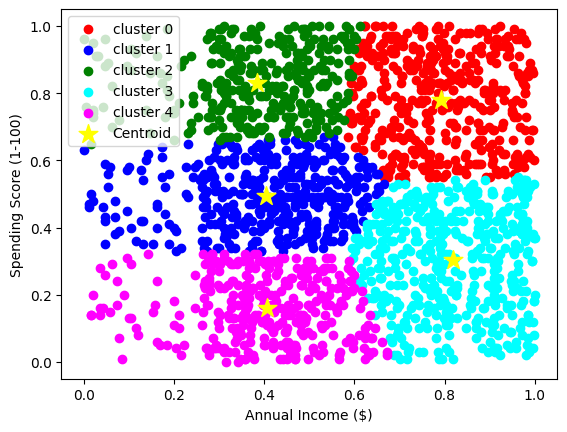

In [15]:
# Separate data for each cluster
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
df4 = df[df['cluster'] == 3]
df5 = df[df['cluster'] == 4]

# Plot each cluster
plt.scatter(df1['Annual Income ($)'], df1['Spending Score (1-100)'], color='red', label='cluster 0')
plt.scatter(df2['Annual Income ($)'], df2['Spending Score (1-100)'], color='blue', label='cluster 1')
plt.scatter(df3['Annual Income ($)'], df3['Spending Score (1-100)'], color='green', label='cluster 2')
plt.scatter(df4['Annual Income ($)'], df4['Spending Score (1-100)'], color='cyan', label='cluster 3')
plt.scatter(df5['Annual Income ($)'], df5['Spending Score (1-100)'], color='magenta', label='cluster 4')

# Plot centroids
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    color='yellow',
    marker='*',
    s=200,
    label='Centroid'
)

plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


## 1.12 Real-World Use Cases of k-Means  

1. **Customer Segmentation:**  
   Businesses can group customers based on income and spending behavior to create targeted marketing strategies.

2. **Business Decision Making:**  
   Companies can identify high-value and low-value customers to improve pricing, promotions, and services.


## Part 2: In-Depth Experimentation with k-Means  

### Elbow Method

The Elbow Method is used to determine the optimal number of clusters for K-Means. We calculate the sum of squared errors (SSE) for different values of k using the features **Annual Income ($)** and **Spending Score (1-100)**. The optimal number of clusters is identified at the "elbow" point, where increasing k further does not significantly reduce the SSE.


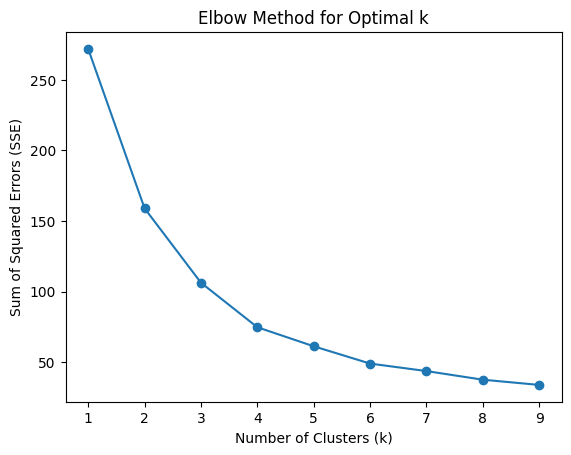

In [16]:
# List to store SSE for each k
sse = []

# Range of k values to test
k_rng = range(1, 10)

# Calculate SSE for each k
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Annual Income ($)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)

# Plot the Elbow Method graph
plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


## Discussion and Observations

From the Elbow Method plot, we can observe how the **sum of squared errors (SSE)** decreases as the **number of clusters (k)** increases. Initially, adding more clusters significantly reduces the SSE, indicating better clustering. However, after a certain point, the reduction in SSE starts to diminish, forming an “elbow” in the plot.

#### Observations:

- The elbow point in the plot suggests the optimal number of clusters for the dataset. Choosing **k** at this point balances clustering accuracy and simplicity.

- Using too few clusters may group dissimilar customers together, while too many clusters may overcomplicate the segmentation without substantial improvement in SSE.

- For our dataset with **Annual Income ($)** and **Spending Score (1-100)**, the plot typically indicates that 5 clusters is a good choice, as it captures the main variations in customer spending behavior and income levels without overfitting.

## Conclusion  

By applying K-Means clustering on the dataset with **Annual Income ($)** and **Spending Score (1-100)**, we were able to segment customers into distinct groups based on their spending behavior and income levels. The Elbow Method indicated that 5 clusters is the optimal number, balancing accuracy and simplicity.

#### This clustering provides valuable insights for businesses:

- It helps identify high-value and low-value customer segments.

- It enables targeted marketing strategies and personalized offers for each customer group.

- It supports data-driven business decisions regarding promotions, pricing, and customer engagement.

Overall, K-Means clustering proved to be an effective tool for understanding customer patterns and enhancing strategic planning.